In [1]:
# library(tidyverse)
# library(repr)
# #library(readxl)
# library(tidymodels)
# #library(ggplot2)
# #install.packages("ggplot2")

library(tidyverse)
library(repr)
library(tidymodels)
library(rsample)
options(repr.matrix.max.rows = 6)
install.packages("ggplot2")
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

age,sex,chest_pain_type,resting_bps,cholestoral,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0
31,0,2,100,219,0,1,150,0,0,NA,NA,NA,0
32,0,2,105,198,0,0,165,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
52,1,4,160,331,0,0,94,1,2.5,NA,NA,NA,1
56,1,4,155,342,1,0,150,1,3.0,2,NA,NA,1
65,1,4,130,275,0,1,115,1,1.0,2,NA,NA,1


age,sex,chest_pain_type,resting_bps,cholestoral,fasting_blood_sugar,rest_ecg,max_heartrate,excercise_angina,depression,slope,major_vessels,thal,heart_disease
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<int>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0
35,0,1,120,160,0,1,185,0,0,NA,NA,NA,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,1,4,150,222,0,0,122,0,2.0,2,NA,NA,1
50,1,4,140,341,0,1,125,1,2.5,2,NA,NA,1
54,0,3,130,294,0,1,100,1,0.0,2,NA,NA,1


age,chest_pain_type,resting_bps,cholestoral,max_heartrate,heart_disease
<int>,<int>,<chr>,<chr>,<chr>,<int>
29,2,140,NA,170,0
31,2,100,219,150,0
32,2,105,198,165,0
⋮,⋮,⋮,⋮,⋮,⋮
52,4,160,331,94,1
56,4,155,342,150,1
65,4,130,275,115,1


Warning message in geom_point(binwidth = 30, fill = "blue", color = "black", alpha = 0.8):
“Ignoring unknown parameters: `binwidth`”
ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while setting up geom.
ℹ Error occurred in the 1st layer.
Caused by error in `compute_geom_1()`:
! `geom_point()` requires the following missing aesthetics: y.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime,

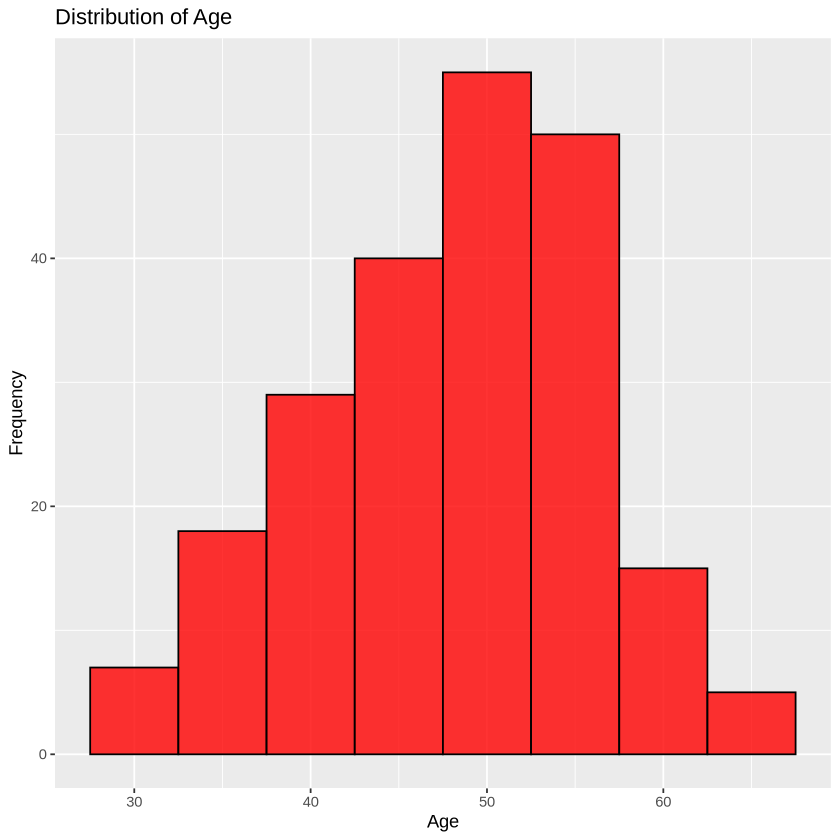

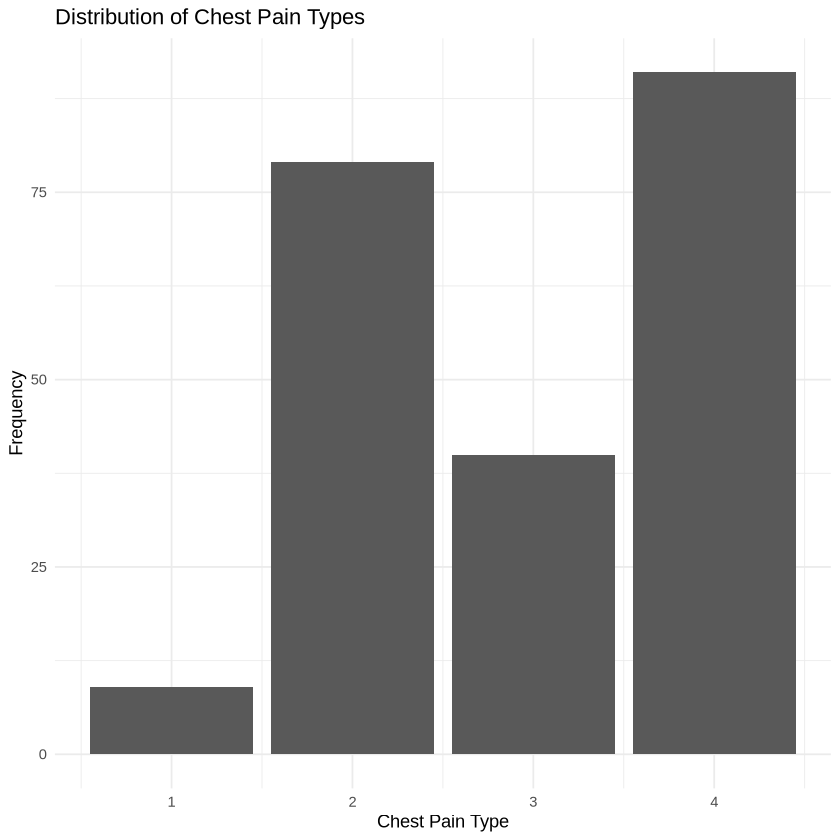

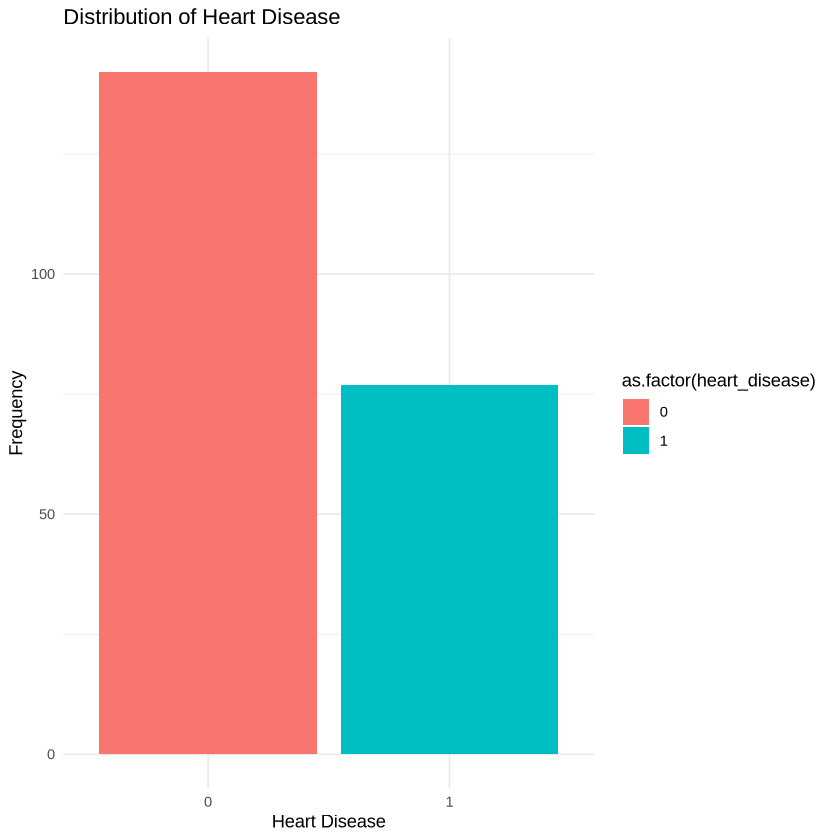

In [3]:
hungry <- read.csv("data/processed.hungarian.data", header = FALSE)

colnames(hungry) <- c("age", 'sex', 'chest_pain_type', 'resting_bps', 'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'max_heartrate', 'excercise_angina', 'depression', 'slope', 'major_vessels', 'thal', 'heart_disease')
hungry[hungry == "?"] <- NA


#hw1 coding team: visualize data (ggpair)?, wrangle, make training and testing data, split training and testing data
# replace '?' to na

# hungry_clean <- hungry |>
#     select(-sex, -excercise_angina, -depression, -slope, -major_vessels, -thal, -rest_ecg, -fasting_blood_sugar) #|>
#    # replace_with_na(replace = list(cholestoral = "?")
#age cp resting_bps cho max_ heart_d

hungry_split <- initial_split(hungry, prop = 3/4, strata = chest_pain_type)
hungry_training <- training(hungry_split)
hungry_testing <- testing(hungry_split)
hungry_training
hungry_testing

hungry_select <- hungry_training |>
    select(age, chest_pain_type, resting_bps, cholestoral, max_heartrate, heart_disease)
hungry_select

p1 <- ggplot(hungry_select, aes(x = resting_bps)) +
  geom_point(binwidth = 30, fill = "blue", color = "black", alpha = 0.8) +
  labs(title = "Distribution of Resting Blood Pressure", x = "Resting Blood Pressure", y = "Frequency")
p1

p3 <- ggplot(hungry_select, aes(x = cholesterol)) +
  geom_histogram(binwidth = 5, fill = "green", color = "black", alpha = 0.8) +
  labs(title = "Distribution of Cholesterol", x = "Cholesterol", y = "Frequency")
p3

p4 <- ggplot(hungry_select, aes(x = age)) +
  geom_histogram(binwidth = 5, fill = "red", color = "black", alpha = 0.8) +
  labs(title = "Distribution of Age", x = "Age", y = "Frequency")
p4

p5 <- ggplot(hungry_select, aes(x = max_heart_rate)) +
  geom_histogram(binwidth = 5, fill = "orange", color = "black", alpha = 0.8) +
  labs(title = "Distribution of Max Heart Rate", x = "Max Heart Rate", y = "Frequency")
p5

# Create a bar plot for categorical predictor variable (chest_pain_type)
p2 <- ggplot(hungry_select, aes(x = chest_pain_type, fill = chest_pain_type)) +
  geom_bar() +
  labs(title = "Distribution of Chest Pain Types", x = "Chest Pain Type", y = "Frequency") +
  theme_minimal()
p2

# Create a bar plot for the target variable (heart_disease)
p6 <- ggplot(hungry_select, aes(x = as.factor(heart_disease), fill = as.factor(heart_disease))) +
  geom_bar() +
  labs(title = "Distribution of Heart Disease", x = "Heart Disease", y = "Frequency") +
  theme_minimal()
p6
